![](../../storage/banners/16_projects.png)

Пары в учебной программе:

- Теормех
- Матан
- Физика: электродинамика
- Физика: мкт, распределения
- Диффуры
- Микроконтроллеры

#### <span style="color:#0ab49a">Кооперация:</span> <span style="color:#A254FC">дилемма заключённого</span> 

#### <span style="color:#0ab49a">Чёрный ящик:</span> <span style="color:#A254FC">параллельное программирование</span> 

##### **Генерация файлика с проекциями**

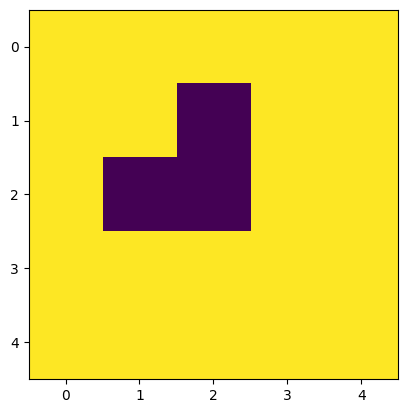

Всего элементов: 5×5=25
Всего вариантов: 2^25 = 33554432


In [1]:
"""
Задача: найти двумерный массив 50×50 (картинку), дающий проекции на оси Ox, Oy. 
Эти проекции известны, вызываются функцией get_noise_projection().
Использовать параллельное программирование для перебора вариантов.
"""

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

N = 5

m = Image.open("img/003.jpg")
m = m.resize([N, N])
a = np.array(m)
a = [[1 if np.mean(a[i][j]) > 255/2 else 0 for i in range(N)]for j in range(N)]
plt.imshow(a)
plt.show()

print(f"Всего элементов: {N}×{N}={N**2}\nВсего вариантов: 2^{N**2} = {2**(N**2)}")

In [65]:
def save_pic_projection():
    with open("projects/projections.py", "w") as f:
        f.wrtie(f'"""\nСуммы строк и столбцов квадратной матрицы {N}×{N}\n"""')
        f.write(f"x_projection = {[sum([a[i][j] for j in range(N)]) for i in range(N)]}\n")
        f.write(f"y_projection = {[sum([a[j][i] for j in range(N)]) for i in range(N)]}\n")

def save_noise_pic_projection():
    pass

save_pic_projection()

##### **Скелет для студента**

In [ ]:
"""
Рекомендую использовать следующие библиотеки:

Распределение задач на процессоры: p_tqdm
Работа со временем: datetime

Так же импортирован файл projections.py
"""
from p_tqdm import p_map
import datetime
from projections import *


def compare_func(m):
    """Тут два варианта, выбор которых зависит от задачи:
    1. Либо функция сравнивает проекции матрицы m с x_projection, y_projection
    2. Либо функция возвращает модуль разницы векторов проекций m и целевых проекций
    В этой задаче, оба варианта подходят, поскольку они решают идентичные задачи. Если же векторы проекций имеют шум, то корректное 
    решение будет только 2."""


def partial_find_it(a, b, c):
    # Функция, передаваемая на разные процессоры

    # Здесь будет Ваш код!
    
    return a  # О возвращаемом 


def find_it(n_p, ...):
    # Функция, осуществляющая поиск

    # Когда распараллеливается выполнение программы на процессоры, им передаётся одинаковая функция (partial_find_it), и разные аргументы
    # Эти аргументы берутся из длинны 
    t0 = dt.datetime.now()
    anws = p_map(partial_find_it, 
                 [a for i in range(n_p)],
                 [b for i in range(n_p)],
                 [c for i in range(n_p)])
    print(f"Затраченное время: {dt.datetime.now() - t0}")


##### **Решение**

In [2]:
from projects.projections import *
x_projection

[5, 4, 3, 5, 5]

In [ ]:
import datetime as dt
from p_tqdm import p_map

def get_loss(pic: list):
    x_proj = [sum([pic[i][j] for j in range(N)]) for i in range(N)]
    y_proj = [sum([pic[j][i] for j in range(N)]) for i in range(N)]
    return sum([int(x_proj[i]!=x_projection[i]) + int(y_proj[i]!=y_projection[i]) for i in range(N)])

min_loss = 1e10
pic_best = None
def find_it(min_loss, pic_best, N_map):

    def partial_find_it(N_range, min_loss, pic_best):
        for a_dec in range(N_range[0], N_range[1]):
            a_bin = bin(a_dec)[2:].rjust(N**2, "0")
            # Составление картинки
            pic_tmp = [[int(a_bin[i*N + j]) for i in range(N)] for j in range(N)]
    
            # Рассчёт потерь
            loss = get_loss(pic_tmp)
            if min_loss > loss:
                min_loss = loss
                pic_best = pic_tmp
    
        return min_loss, pic_best
        
    t0 = dt.datetime.now()
    anws = p_map(partial_find_it, 
                [(int(num//N_map)*i, int(num//N_map)*(i+1) if (i+1)<N_map else num) for i in range(N_map)],
                [min_loss for i in range(N_map)],
                [pic_best for i in range(N_map)])
    print(f"Затраченное время: {dt.datetime.now() - t0}")
    
    for anw in anws:
        if min_loss > anw[0]:
            min_loss = anw[0]
            pic_best = anw[1]
    return min_loss, pic_best
    

min_loss, pic_best = find_it(min_loss, pic_best, 50)
plt.imshow(pic_best)
plt.show()

#### <span style="color:#0ab49a">Хэш-функции:</span> <span style="color:#A254FC">шифрование и дешифрование</span> 

#### <span style="color:#0ab49a">Задача 3 тел:</span> <span style="color:#A254FC">резонанс кого-то там</span> 

#### <span style="color:#0ab49a">Gym:</span> <span style="color:#A254FC">двойной маятник</span> 

In [89]:
import gymnasium as gym

env = gym.make("CartPole-v1")
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n   

terminal_state = False
state = env.reset()
# state = np.reshape(state, [1, observation_space])  

while True:
    #env.render()
    # action = dqn_solver.act(state)
    action = np.random.randint(2)
    # print(env.step(action))
    state_next, reward, terminal, info, _ = env.step(action)
    state = np.reshape(state_next, [1, observation_space])
    # print(state)
    print(state[0])
      
    if terminal:
        break

[ 0.02830734 -0.15921979  0.03777779  0.29856065]
[ 0.02512294 -0.3548593   0.043749    0.6029146 ]
[ 0.01802576 -0.550565    0.0558073   0.9090503 ]
[ 0.00701446 -0.74639606  0.0739883   1.2187384 ]
[-0.00791346 -0.5523018   0.09836307  0.9501264 ]
[-0.0189595  -0.35863167  0.1173656   0.6898975 ]
[-0.02613213 -0.5551698   0.13116355  1.017103  ]
[-0.03723553 -0.7517733   0.1515056   1.3479266 ]
[-0.052271   -0.5588451   0.17846414  1.1062218 ]
[-0.0634479  -0.36646023  0.20058857  0.8744182 ]
[-0.0707771  -0.5636609   0.21807694  1.2228667 ]


In [86]:
state

array([[ 0.14828601,  1.3443959 , -0.22132792, -2.122732  ]],
      dtype=float32)

In [78]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [ ]:
dir(env.observation_space.high)